In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
import statsmodels.api as sm

#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
#as well as for conducting statistical tests, and statistical data exploration.
#An extensive list of result statistics are available for each estimator.
#The results are tested against existing statistical packages to ensure that they are correct.

In [2]:
super_df = pd.read_excel('Superstore.xls')

In [3]:
super_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Basic EDA


In [4]:
super_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
super_df.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [6]:
super_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
super_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [8]:
super_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Furniture Forecasting

In [9]:
furniture = super_df.loc[super_df['Category']== 'Furniture']

In [10]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [11]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
r_col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [13]:
furniture.drop(r_col, axis =1 , inplace=True)

C:\Users\atharva\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [15]:
furniture = furniture.sort_values('Order Date')

In [16]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [17]:
furniture  = furniture.set_index('Order Date')

In [18]:
furniture

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [19]:
furniture_y = furniture['Sales'].resample('MS').mean()
# MS = Month Start frequency

In [20]:
furniture_y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

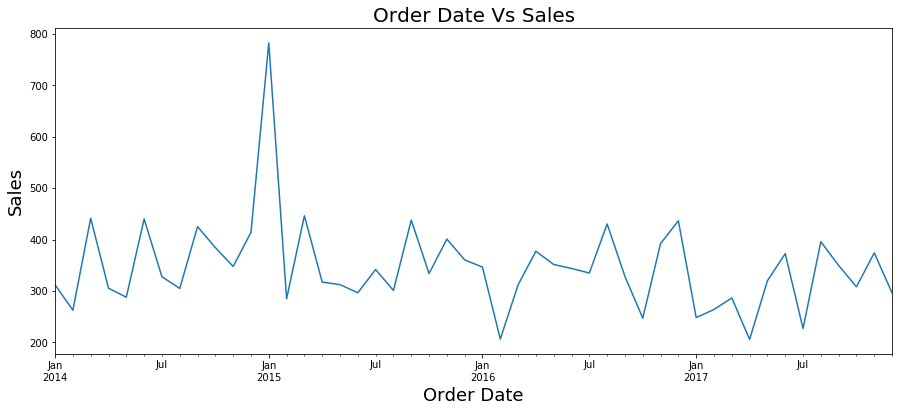

In [21]:
furniture_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [22]:
from pylab import rcParams as rc

In [23]:
rc['figure.figsize']= 10, 14

In [24]:
decomposition = sm.tsa.seasonal_decompose(furniture_y,model='additive')

# y(t) = Level + Trend + Seasonality + Noise --> Additive

In [25]:
print("Trend \n ")
print(decomposition.trend)
print("Seasonal \n ")
print(decomposition.seasonal)
print("Residual \n ")
print(decomposition.resid)
print("Observed \n ")
print(decomposition.observed)

Trend 
 
Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-

<function matplotlib.pyplot.show(*args, **kw)>

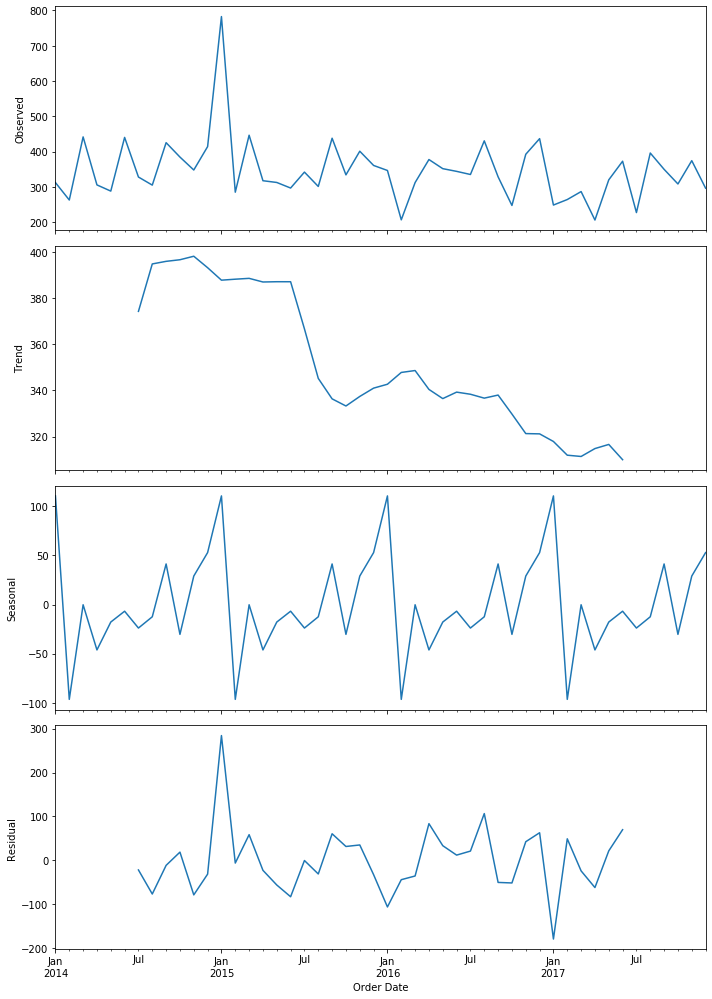

In [26]:
fig = decomposition.plot()
plt.show

# Forecasting With ARIMA

In [27]:
p=d=q=range(0,2)

In [28]:
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [29]:
pdq = list(itertools.product(p,d,q))

In [30]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [31]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [32]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(furniture_y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 688.3112416991725
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1324.3661507188076
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 426.20464898591723


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 452.8238602501692
ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 421.1756110053355
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 295.446456472235
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 641.124068066579
ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2769.7875462923853
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 416.5496453364607
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 455.1115473662885


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 411.57840713552736
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 297.44640662502366
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 580.6389269639644


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1296.1966120951458
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 433.35521367147123
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 437.46040107889746


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1300.2660573079893
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 294.11584524769427
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 538.8964721447207
ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2853.9902688530165
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 412.87269899051546
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 419.1839792724945
ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : nan


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 273.4032454636427
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 592.7661498749849


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1252.859591514394
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 427.7241159738327
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 420.41145389920365
ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 422.29220651941375
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 273.5840395565934
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 553.2719417804199
ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 3089.7987255063535
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 418.52617830891893
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 422.4003583323479
ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 388.5413706209056
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 275.47757405308175
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 566.5211872508684


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1363.7299705795044
ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 430.33057708179365
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 397.3668981651521


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1068.8170935523485
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 273.44153987929343
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 540.6257368397362
ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2511.949524294966
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 414.772617304297
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 391.83032555747764


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 2460.0839964597776
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 263.9371084381265


### ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 263.9371084381265 ---> Best Parameter

In [34]:
mod = sm.tsa.statespace.SARIMAX(furniture_y,
                               order=(1,1,1),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)

In [35]:
results = mod.fit()

In [36]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9742   6.86e-05   9.22e+07      0.000    6323.974    6323.974


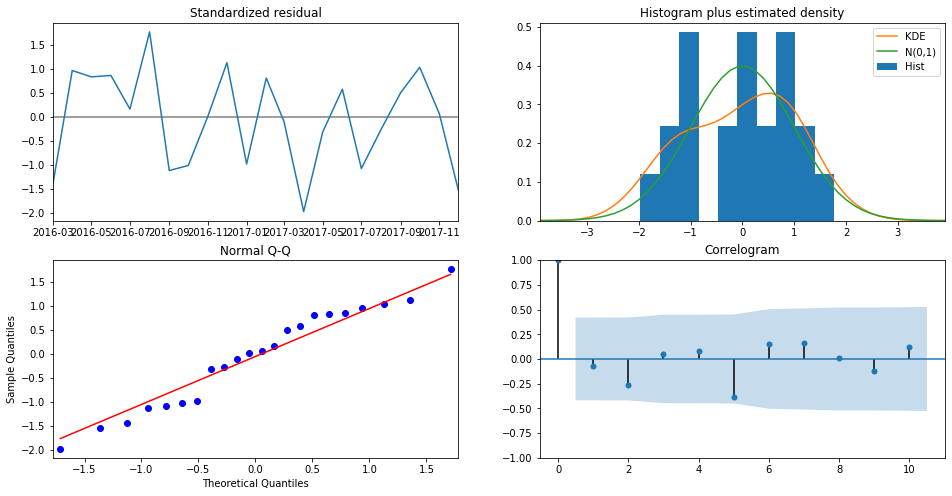

In [37]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

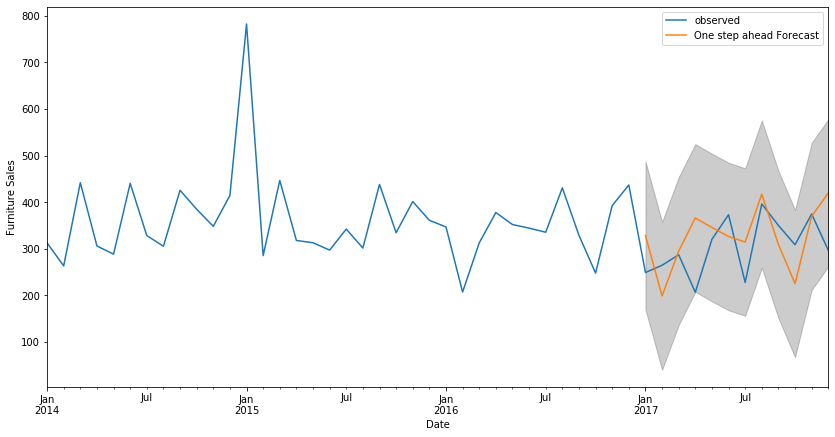

In [43]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = furniture_y['2014':].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [42]:
furniture_forecasted = pred.predicted_mean
furn_truth = furniture_y['2017-01-01':]
mse = ((furniture_forecasted - furn_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :5911.26


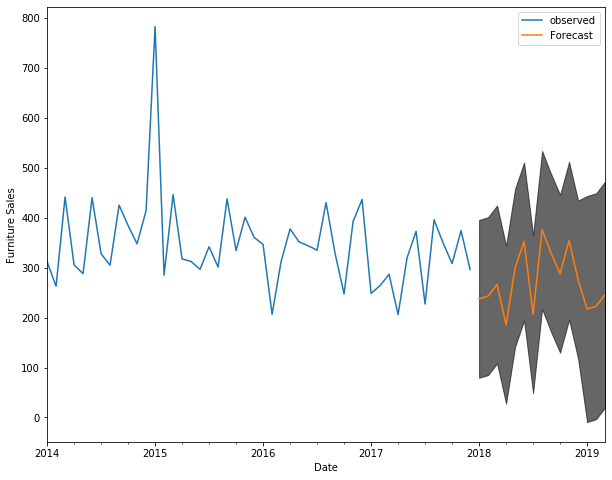

In [49]:
pred_uc = results.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

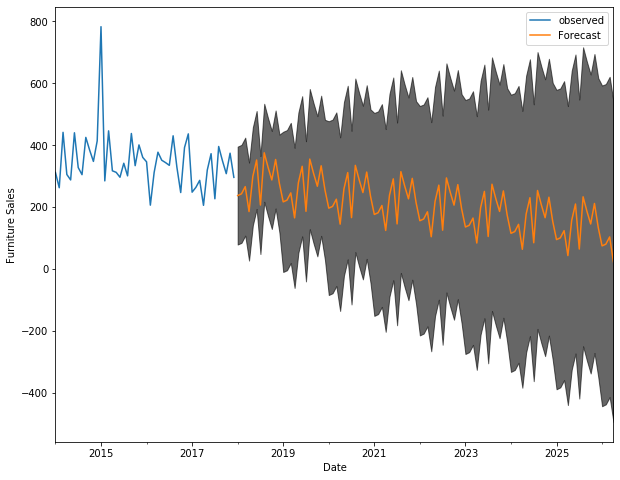

In [50]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Office Supplies Forecast

In [51]:
o_s= super_df.loc[super_df['Category']== 'Office Supplies']

In [52]:
o_s

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [53]:
o_s_col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [54]:
o_s.drop(o_s_col, axis =1 , inplace=True)

In [55]:
o_s

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [56]:
os = o_s.sort_values('Order Date')
os = os.set_index('Order Date')

In [57]:
os

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,20.720
2017-12-30,52.776


In [58]:
os_y = os['Sales'].resample('MS').mean()

In [59]:
os_y.tail()

Order Date
2017-08-01    210.208755
2017-09-01    112.309306
2017-10-01    135.512894
2017-11-01    117.873921
2017-12-01    108.316520
Freq: MS, Name: Sales, dtype: float64

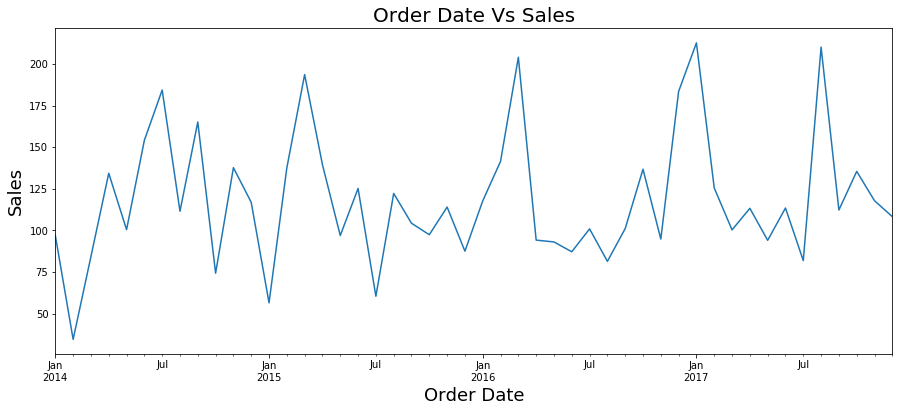

In [60]:
os_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [61]:
rc['figure.figsize']= 12, 14

In [62]:
decomposition_os = sm.tsa.seasonal_decompose(os_y,model='additive')

In [63]:
print("Trend \n ")
print(decomposition_os.trend)
print("Seasonal \n ")
print(decomposition_os.seasonal)
print("Residual \n ")
print(decomposition_os.resid)
print("Observed \n ")
print(decomposition_os.observed)

Trend 
 
Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    114.584229
2014-08-01    117.191470
2014-09-01    126.041021
2014-10-01    130.810158
2014-11-01    130.876572
2014-12-01    129.523142
2015-01-01    123.155303
2015-02-01    118.437987
2015-03-01    116.347665
2015-04-01    114.775474
2015-05-01    114.751824
2015-06-01    112.542300
2015-07-01    113.871378
2015-08-01    116.586068
2015-09-01    117.181825
2015-10-01    115.726725
2015-11-01    113.678375
2015-12-01    111.932576
2016-01-01    112.032870
2016-02-01    112.019188
2016-03-01    110.185966
2016-04-01    111.692589
2016-05-01    112.531768
2016-06-01    115.730061
2016-07-01    123.686673
2016-08-01    126.977451
2016-09-01    121.988775
2016-10-01    118.462308
2016-11-01    119.298965
2016-12-01    120.435188
2017-01-01    120.737215
2017-02-01    125.308719
2017-03-01    131.138686
2017-

<function matplotlib.pyplot.show(*args, **kw)>

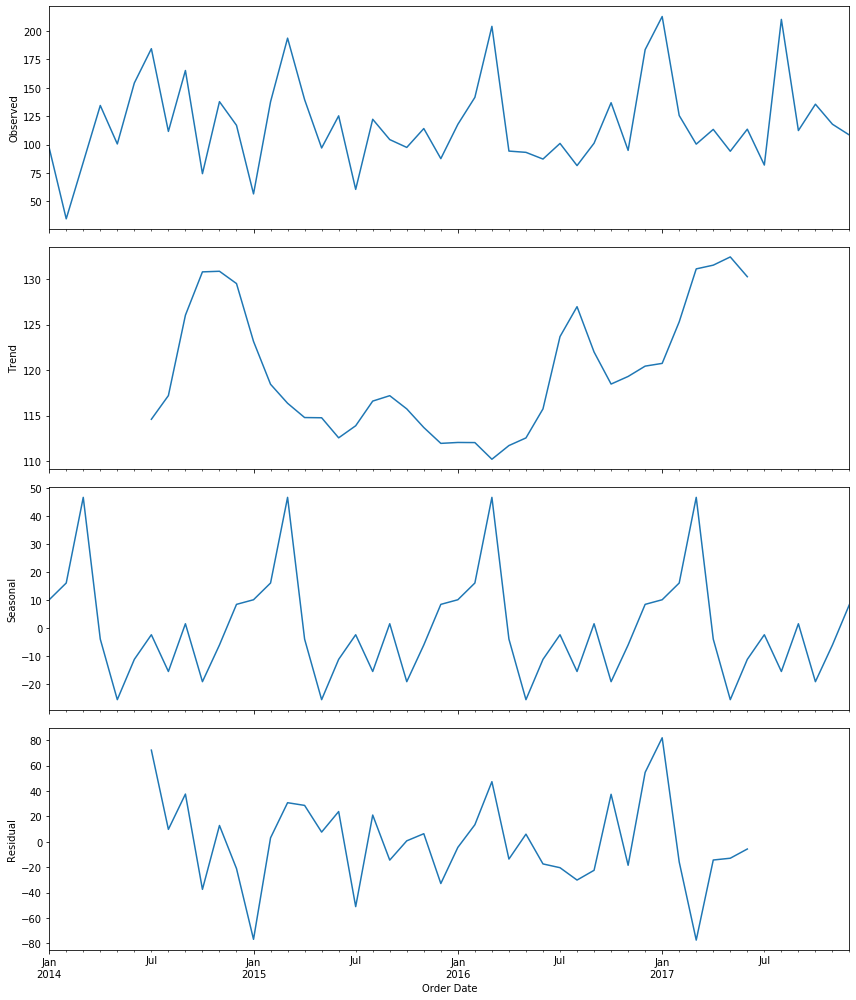

In [64]:
fig = decomposition_os.plot()
plt.show

In [65]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(os_y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()
            
            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))
            
        except:
             continue

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 589.5002315061224
ARIMA(0, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 1635.4123516764182
ARIMA(0, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 383.4175511140882
ARIMA(0, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 394.8386791980883


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1590.8358828487967
ARIMA(0, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 260.5044719309093
ARIMA(0, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 545.8315751699371


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 2572.0141303472824
ARIMA(0, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 371.81948302766335
ARIMA(0, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 396.43734243158076
ARIMA(0, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 3379.8977771093423
ARIMA(0, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 262.1735163819378
ARIMA(0, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 496.80496097746254
ARIMA(0, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1342.1831107749285
ARIMA(0, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 391.41369839961806
ARIMA(0, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 378.31299876316575


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1371.180201346244
ARIMA(0, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 262.69697403059604
ARIMA(0, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 466.08708096276905
ARIMA(0, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 3173.744146852689
ARIMA(0, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 363.8692923372797
ARIMA(0, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 363.3413721124746
ARIMA(0, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 3068.4548930721694
ARIMA(0, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 253.95620060318254
ARIMA(1, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 507.92776839081154


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (0, 0, 1, 12) 12 -- AIC : 898.6158451418273
ARIMA(1, 0, 0) x (0, 1, 0, 12) 12 -- AIC : 385.3530650496242
ARIMA(1, 0, 0) x (1, 0, 0, 12) 12 -- AIC : 379.412366416097


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x (1, 0, 1, 12) 12 -- AIC : 1224.0886432899579
ARIMA(1, 0, 0) x (1, 1, 0, 12) 12 -- AIC : 251.60541618302173
ARIMA(1, 0, 1) x (0, 0, 0, 12) 12 -- AIC : 478.4618435487729


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x (0, 0, 1, 12) 12 -- AIC : 1415.9501675537579
ARIMA(1, 0, 1) x (0, 1, 0, 12) 12 -- AIC : 373.32360022937445
ARIMA(1, 0, 1) x (1, 0, 0, 12) 12 -- AIC : 366.7676778921124
ARIMA(1, 0, 1) x (1, 0, 1, 12) 12 -- AIC : 2034.5261402395045
ARIMA(1, 0, 1) x (1, 1, 0, 12) 12 -- AIC : 253.20920156285968
ARIMA(1, 1, 0) x (0, 0, 0, 12) 12 -- AIC : 488.29070583427034
ARIMA(1, 1, 0) x (0, 0, 1, 12) 12 -- AIC : 1212.3884450238336


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (0, 1, 0, 12) 12 -- AIC : 385.40219080742594
ARIMA(1, 1, 0) x (1, 0, 0, 12) 12 -- AIC : 363.254134425917


C:\Users\atharva\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x (1, 0, 1, 12) 12 -- AIC : 1217.2614624021612
ARIMA(1, 1, 0) x (1, 1, 0, 12) 12 -- AIC : 251.52080309054713
ARIMA(1, 1, 1) x (0, 0, 0, 12) 12 -- AIC : 467.4149315857402
ARIMA(1, 1, 1) x (0, 0, 1, 12) 12 -- AIC : 2952.6380129658514
ARIMA(1, 1, 1) x (0, 1, 0, 12) 12 -- AIC : 365.7158294572363
ARIMA(1, 1, 1) x (1, 0, 0, 12) 12 -- AIC : 354.35009406622044
ARIMA(1, 1, 1) x (1, 0, 1, 12) 12 -- AIC : 3077.9159074441
ARIMA(1, 1, 1) x (1, 1, 0, 12) 12 -- AIC : 246.479666199784


In [66]:
mod_os = sm.tsa.statespace.SARIMAX(os_y,
                               order=(1,1,1),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)

results_os = mod_os.fit()

In [67]:
print(results_os.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1114      0.352      0.316      0.752      -0.579       0.802
ma.L1         -1.0000      0.342     -2.923      0.003      -1.671      -0.330
ar.S.L12      -0.2542      0.286     -0.890      0.374      -0.814       0.306
sigma2      2704.3755      0.000   2.14e+07      0.000    2704.375    2704.376


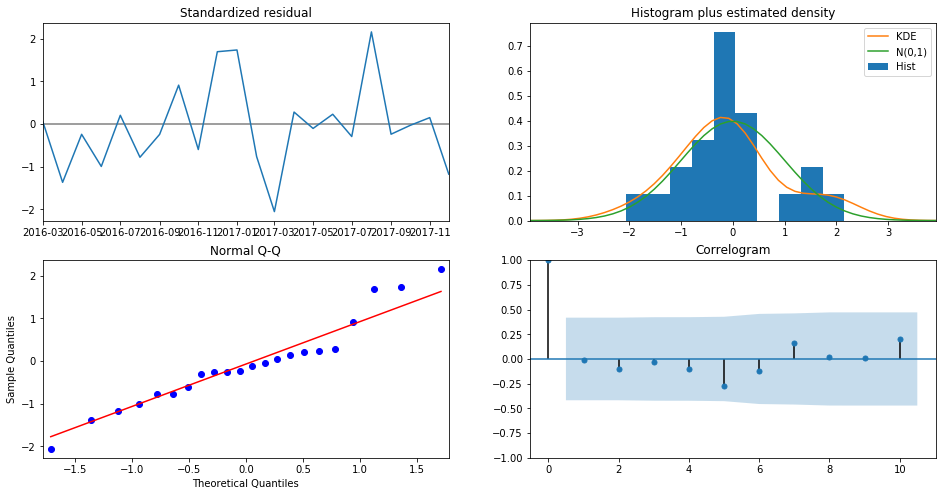

In [68]:
results_os.plot_diagnostics(figsize=(16,8))
plt.show()

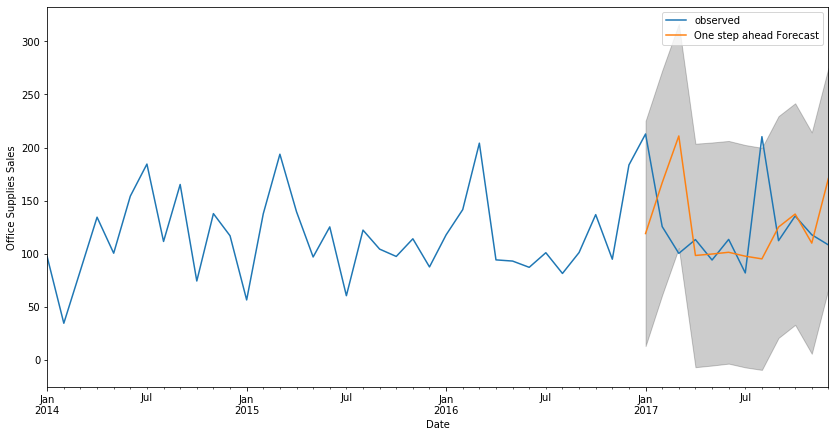

In [70]:
pred_os = results_os.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci_os = pred_os.conf_int()

ax = os_y['2014':].plot(label= 'observed')

pred_os.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 7, figsize= (14,7))

ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()

plt.show()

In [71]:
office_forecasted = pred_os.predicted_mean
office_truth = os_y['2017-01-01':]
mse = ((office_forecasted - office_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse,2)))

MSE of forecast :3393.63


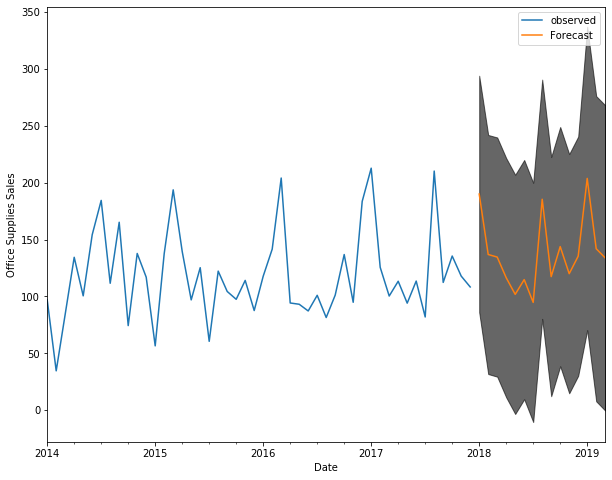

In [73]:
pred_uc_os = results.get_forecast(steps = 15)
pred_ci_os = pred_uc_os.conf_int()

ax = os_y.plot(label='observed', figsize=(10,8))
pred_uc_os.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()

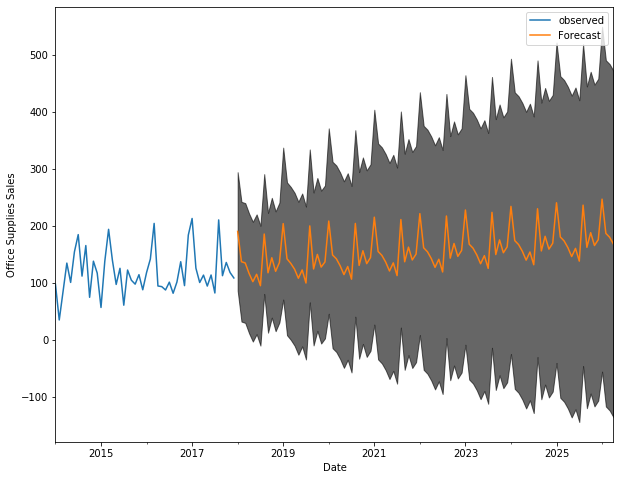

In [74]:
pred_uc_os = results.get_forecast(steps = 100)
pred_ci_os = pred_uc_os.conf_int()

ax = os_y.plot(label='observed', figsize=(10,8))
pred_uc_os.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()